In [13]:


import better 

import numpy as np
from solver_for_yagi_uda import directional_pattern

#* Define constants
light_speed, mu0, eps0 = 299792458., 4*np.pi*1e-7, 8.854e-12
frequency = 1e6 * 144
omega = 2 * np.pi * frequency
incident_voltage = 20

#! Spatial resolution
delta_z = light_speed / frequency / 10e2

l = light_speed / frequency

#* set geometry of antenna
element_position = np.array([[0.0, 0.0, 0.0], [0.0, 0.517, 0.0], [0.0, 0.517+0.209*1, 0.0], [0.0, 0.517+0.209*2, 0.0], [0.0,0.517+0.209*3, 0.0], [0.0, 0.517+0.209*4, 0.0], [0.0, 0.517+0.209*5, 0.0], [0.0, 0.517+0.209*6, 0.0], [0.0, 0.517+0.209*7, 0.0]], dtype = float)
element_length = np.array([1.071, 0.985, 0.991, 0.899, 0.880, 0.868, 0.862, 0.844, 0.831], dtype = float)
wire_radius = np.array([3.175e-3, 3.175e-3, 3.175e-3, 3.175e-3, 3.175e-3, 3.175e-3, 3.175e-3, 3.175e-3, 3.175e-3], dtype = float)
source_position = np.array([element_position[1]], dtype = float)

R, R_block, element_num, incident_field, impedance, current, current_block, E_total, phi = directional_pattern (frequency, delta_z, incident_voltage, element_position, element_length, wire_radius, source_position)

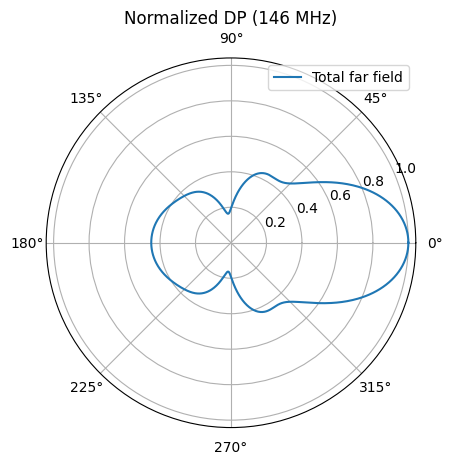

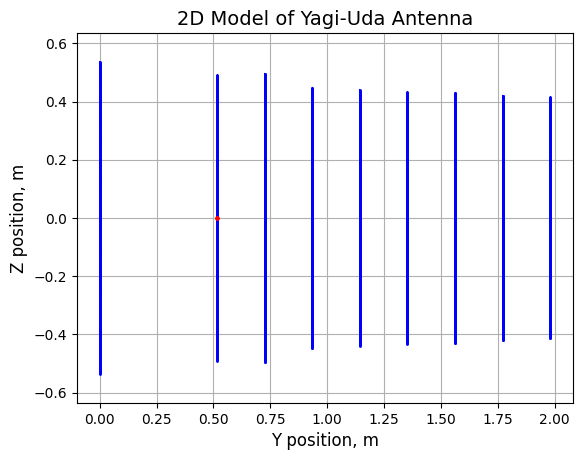

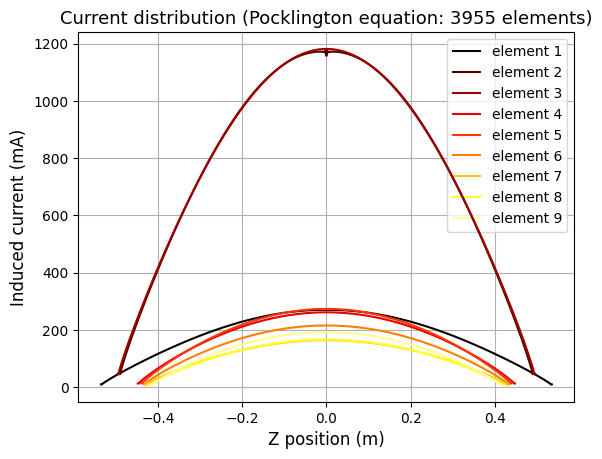

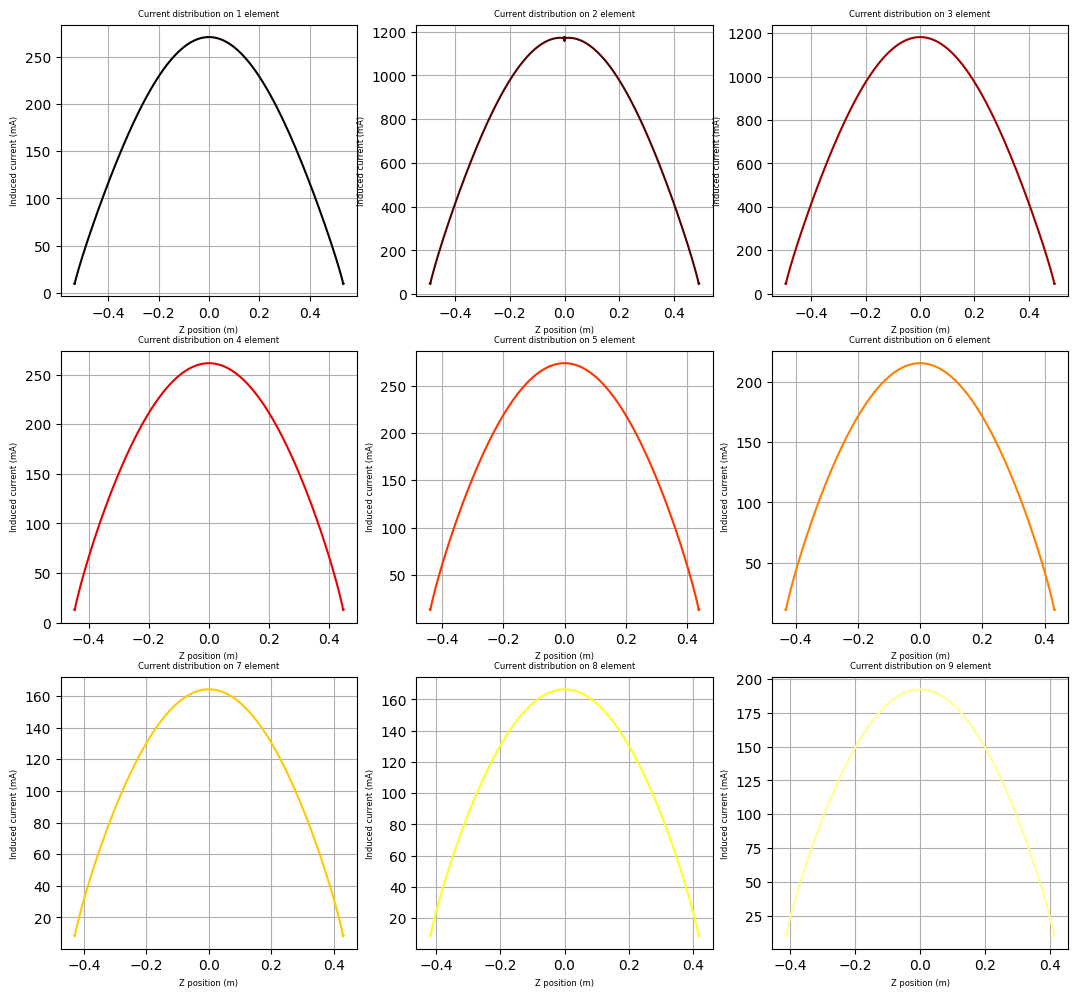

In [15]:
from yagi_visualization import plot_2dmodel, plot_together, plot_separately, current_distribution_2d, current_distribution_3d
import matplotlib.pyplot as plt

plt.polar(phi, (E_total/np.max(E_total)), label = "Total far field")
plt.title("Normalized DP (146 MHz)")
plt.legend()
plot_2dmodel(R, source_position, sum(element_num), delta_z)
plot_together(R_block, current_block)
plot_separately(R_block, current_block)
current_distribution_2d(R, current)
current_distribution_3d(R, source_position, R_block, current_block)